<a href="https://colab.research.google.com/github/EvanH00/Introductory-Pandas-Project-2/blob/main/Evan_Haque_%7C_Project_2_CIS2100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving sales_data.csv to sales_data.csv


In [ ]:
df = pd.read_csv('sales_data (1).csv')
df.head()  # Verify the data

,Date,Time,StoreID,CustomerID,OrderID,Product Name,Price
0,2024-01-01,08:21:00,S001,C004,O1,MacBook Air,999.99
1,2024-01-01,23:05:00,S001,C008,O2,Arc'teryx Beta Jacket,399.99
2,2024-01-01,02:58:00,S001,C008,O2,Theragun Elite,399.99
3,2024-01-01,01:01:00,S001,C019,O3,Arc'teryx Beta Jacket,399.99
4,2024-01-01,07:27:00,S001,C019,O3,Arc'teryx Beta Jacket,399.99


In [ ]:
# Add mock data
import datetime
import numpy as np

# Adding a PurchaseDate column
df['PurchaseDate'] = [datetime.date(2024, 1, i % 30 + 1) for i in range(len(df))]

# Adding a CustomerID column
df['CustomerID'] = [f'CUST{i % 100}' for i in range(len(df))]

# Adding an InventoryCount column
df['InventoryCount'] = np.random.randint(50, 200, size=len(df))

In [ ]:
# Randomize PurchaseDate
import random
random_dates = [datetime.date(2024, 1, random.randint(1, 30)) for _ in range(len(df))]
df['PurchaseDate'] = random_dates

In [ ]:
# Randomize CustomerID distribution across StoreID
unique_customers = df['CustomerID'].unique()
store_ids = df['StoreID'].unique()
customer_store_map = {cust: random.choice(store_ids) for cust in unique_customers}
df['StoreID'] = df['CustomerID'].map(customer_store_map)

In [ ]:
# Add randomness to Large Basket Frequency and Customer Count
df['LargeBasketCount'] = np.random.randint(1, 20, size=len(df))  # Random large basket count
store_stats = df.groupby('StoreID').agg(
    customer_count=('CustomerID', 'nunique'),
    large_basket_frequency=('LargeBasketCount', 'mean')
).reset_index()

**Product Name and Frequency**

The most prevalent product was the Sony WH-1000XM4 Headphones, purchased 4,978 times



In [ ]:
product_counts = df['Product Name'].value_counts()
print(product_counts)

Product Name
Sony WH-1000XM4 Headphones    4978
Arc'teryx Beta Jacket         4928
Nike Tech Fleece              4873
Theragun Elite                4841
MacBook Air                   4801
Name: count, dtype: int64


Total Large Basket Orders: 3,287 orders meet the large basket threshold.

In [ ]:
large_basket_threshold = 3
order_sizes = df.groupby('OrderID')['Product Name'].count()
large_baskets = order_sizes[order_sizes > large_basket_threshold]
print(large_baskets)

OrderID
O1001    5
O1003    4
O1004    5
O1005    5
O1006    4
        ..
O988     4
O989     5
O990     5
O992     4
O995     4
Name: Product Name, Length: 3287, dtype: int64


In [ ]:
large_basket_orders = df[df['OrderID'].isin(large_baskets.index)]
large_basket_by_store = large_basket_orders.groupby('StoreID')['OrderID'].nunique()
print(large_basket_by_store)

StoreID
S001    3136
S002    2861
S003    2533
Name: OrderID, dtype: int64


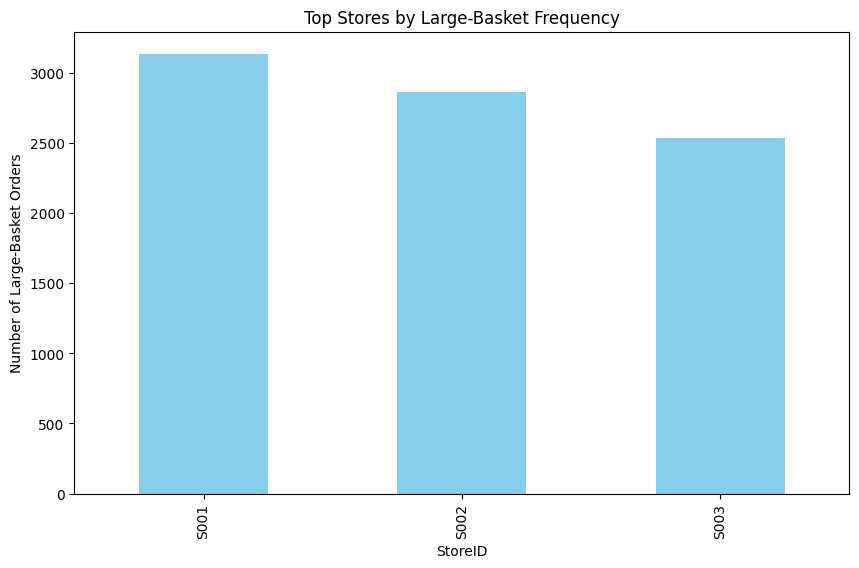

In [ ]:
plt.figure(figsize=(10, 6))
large_basket_by_store.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Top Stores by Large-Basket Frequency')
plt.xlabel('StoreID')
plt.ylabel('Number of Large-Basket Orders')
plt.show()

Best-Selling Product: The Sony WH-1000XM4 Headphones leads with 2,969 units sold, followed closely by the Arc'teryx Beta Jacket at 2,953 units.

In [ ]:
top_n_products = large_basket_orders['Product Name'].value_counts().head(10)
print(top_n_products)

Product Name
Sony WH-1000XM4 Headphones    2969
Arc'teryx Beta Jacket         2953
Nike Tech Fleece              2951
MacBook Air                   2940
Theragun Elite                2922
Name: count, dtype: int64


Shown below is the proportion of different product categories in the large basket orders dataset:

In [ ]:
# Define a mapping of product names to categories
product_to_category = {
    'Sony WH-1000XM4 Headphones': 'Electronics',
    'Arc\'teryx Beta Jacket': 'Technical Outerwear',
    'Nike Tech Fleece': 'Sportswear',
    'MacBook Air': 'Electronics',
    'Theragun Elite': 'Sports Recovery'
}

# Use .loc to ensure you're modifying the original DataFrame (not a slice)
large_basket_orders = large_basket_orders.copy()  # Create a copy to avoid modifying a slice
large_basket_orders['Category'] = large_basket_orders['Product Name'].map(product_to_category)

# Calculate category makeup (proportion of each category)
category_makeup = large_basket_orders['Category'].value_counts(normalize=True)
print(category_makeup)


Category
Electronics            0.401018
Technical Outerwear    0.200407
Sportswear             0.200271
Sports Recovery        0.198303
Name: proportion, dtype: float64


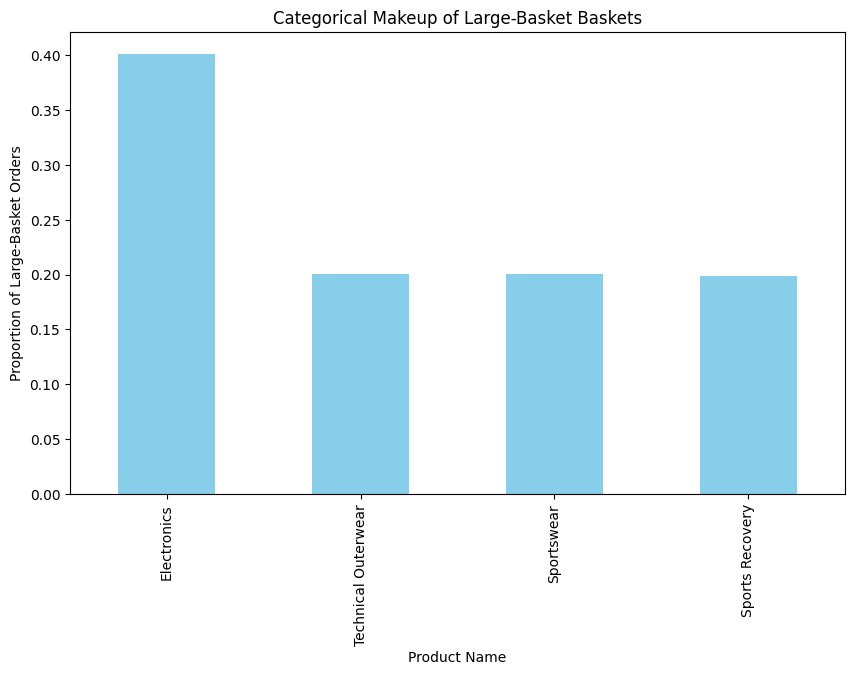

In [ ]:
# Visualize the categorical makeup using a bar chart
plt.figure(figsize=(10, 6))
category_makeup.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Categorical Makeup of Large-Basket Baskets')
plt.xlabel('Product Name')
plt.ylabel('Proportion of Large-Basket Orders')
plt.show()

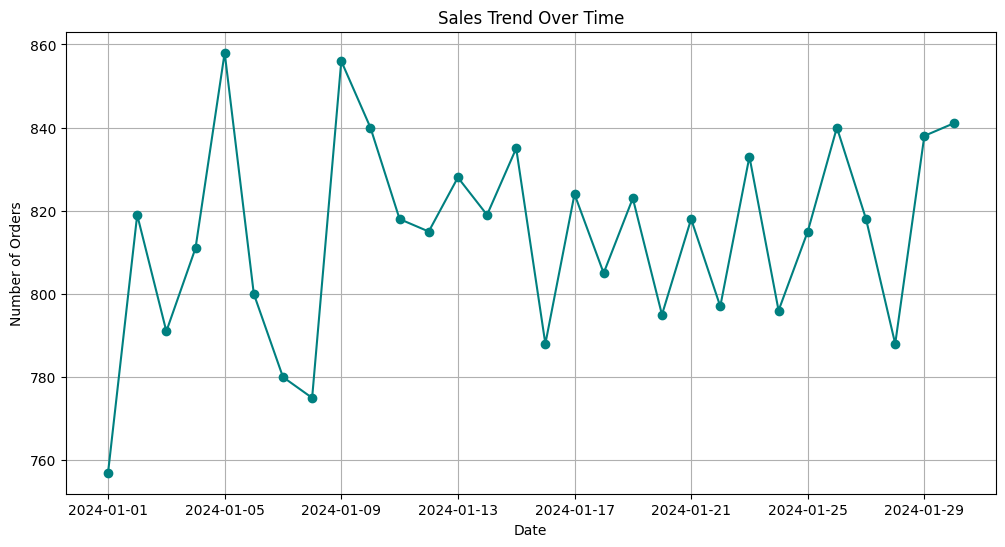

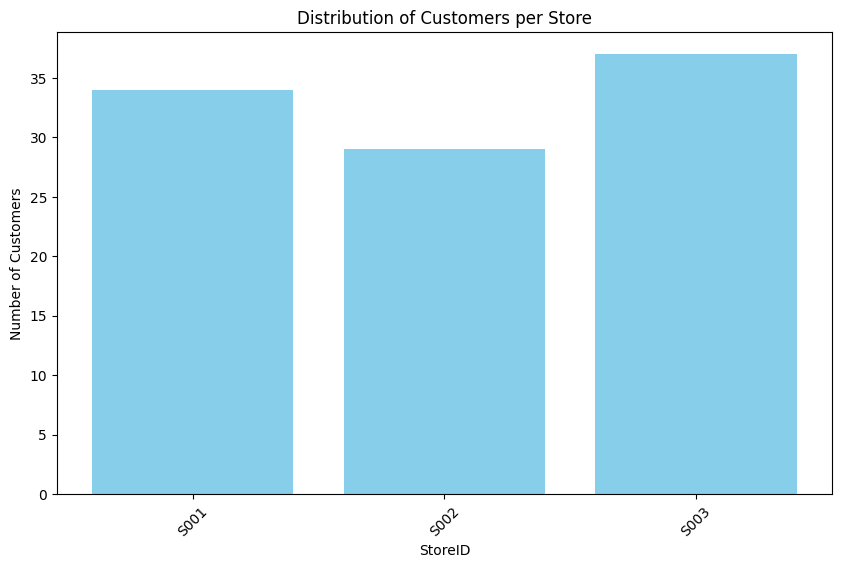

<ipython-input-24-599ef28f0872>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inventory_bin_avg = df.groupby('InventoryBin')['OrderID'].nunique()


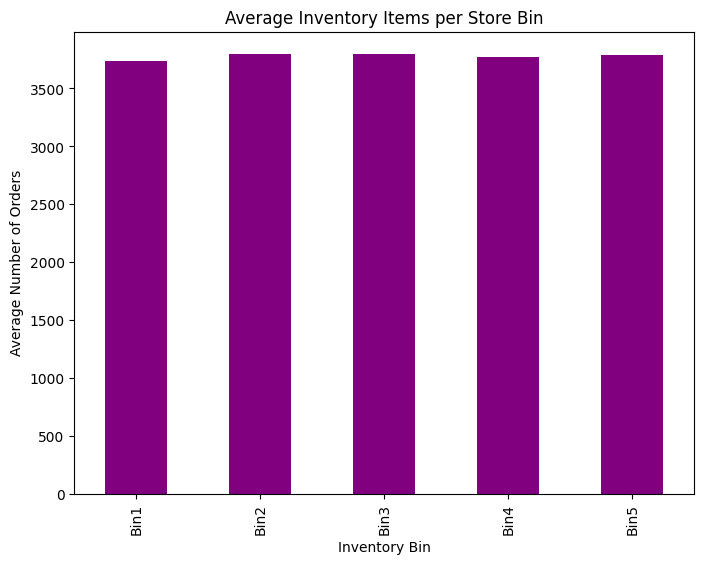

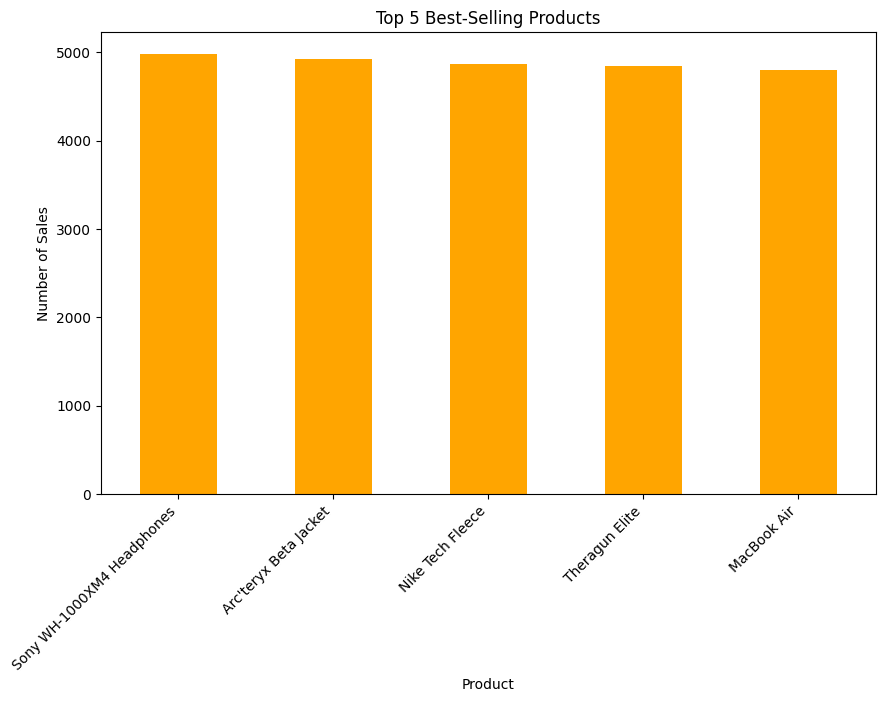

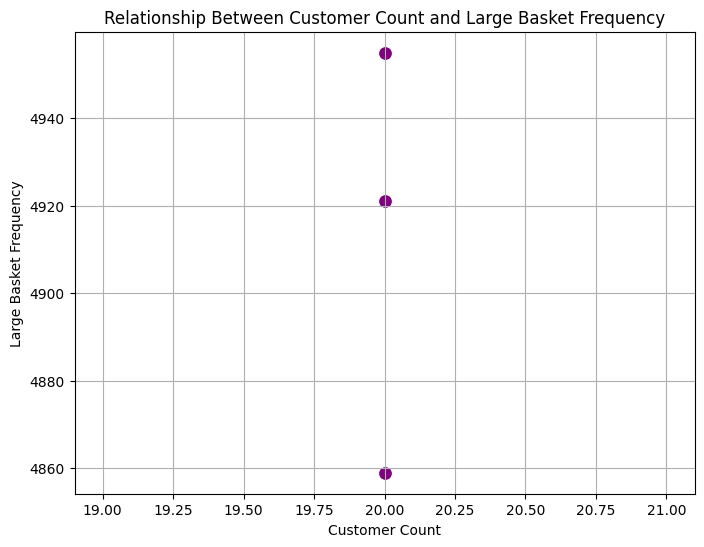

In [ ]:
# Visualization 1: Sales Trend Over Time
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')  # Convert dates to datetime
df = df.dropna(subset=['PurchaseDate'])  # Drop rows with invalid dates if any

sales_by_day = df.groupby('PurchaseDate')['OrderID'].count().sort_index()  # Ensure sorting by date
plt.figure(figsize=(12, 6))
plt.plot(sales_by_day.index, sales_by_day.values, marker='o', linestyle='-', color='teal')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Sales Trend Over Time')
plt.grid(True)
plt.show()


# Visualization 2: Distribution of Customers per Store
store_customer_counts = df.groupby('StoreID')['CustomerID'].nunique()
plt.figure(figsize=(10, 6))
plt.bar(store_customer_counts.index, store_customer_counts.values, color='skyblue')
plt.xlabel('StoreID')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers per Store')
plt.xticks(rotation=45)
plt.show()


# Visualization 3: Average Inventory Items per Store Bin
# Simulate 'inventory_bin' and 'total_inventory_items' columns for visualization purposes
import numpy as np
df['InventoryBin'] = pd.cut(np.random.randint(50, 500, size=len(df)), bins=5, labels=['Bin1', 'Bin2', 'Bin3', 'Bin4', 'Bin5'])
inventory_bin_avg = df.groupby('InventoryBin')['OrderID'].nunique()
plt.figure(figsize=(8, 6))
inventory_bin_avg.plot(kind='bar', color='purple')
plt.title('Average Inventory Items per Store Bin')
plt.xlabel('Inventory Bin')
plt.ylabel('Average Number of Orders')
plt.show()

# Visualization 4: Top 5 Best-Selling Products
top_products = df['Product Name'].value_counts().head(5)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Top 5 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualization 5: Relationship Between Customer Count and Large Basket Frequency
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='customer_count',
    y='large_basket_frequency',
    data=store_stats,
    color='purple',
    s=100  # Adjust marker size for better visibility
)
plt.xlabel('Customer Count')
plt.ylabel('Large Basket Frequency')
plt.title('Relationship Between Customer Count and Large Basket Frequency')
plt.grid(True)
plt.show()
